#  #Validation of Flap model

In [1]:
include("../src/UNSflow.jl")

objc[2277]: Class TKApplication is implemented in both /System/Library/Frameworks/Tk.framework/Versions/8.5/Tk and /Users/kiran/.julia/v0.4/Conda/deps/usr/lib/libtk8.5.dylib. One of the two will be used. Which one is undefined.
objc[2277]: Class TKMenu is implemented in both /System/Library/Frameworks/Tk.framework/Versions/8.5/Tk and /Users/kiran/.julia/v0.4/Conda/deps/usr/lib/libtk8.5.dylib. One of the two will be used. Which one is undefined.
objc[2277]: Class TKContentView is implemented in both /System/Library/Frameworks/Tk.framework/Versions/8.5/Tk and /Users/kiran/.julia/v0.4/Conda/deps/usr/lib/libtk8.5.dylib. One of the two will be used. Which one is undefined.
objc[2277]: Class TKWindow is implemented in both /System/Library/Frameworks/Tk.framework/Versions/8.5/Tk and /Users/kiran/.julia/v0.4/Conda/deps/usr/lib/libtk8.5.dylib. One of the two will be used. Which one is undefined.
/Users/kiran/.julia/v0.4/Conda/deps/usr/lib/python2.7/site-packages/matplotlib/font_manager.py:273: 

LoadError: LoadError: LoadError: LoadError: syntax: unexpected "]" in argument list
while loading /Users/kiran/Documents/Projects/UNSflow/src/postprocess.jl, in expression starting on line 164
while loading /Users/kiran/Documents/Projects/UNSflow/src/UNSflow.jl, in expression starting on line 24
while loading In[1], in expression starting on line 1

In [3]:
using UNSflow


# # Laura's case C - flap only

In [5]:
#Kinematics
alpha_amp = 0.
alpha_mean = 0.
alpha_zl = 0. #Flat plate
h_amp = 0. 
k = 3.93
beta_amp = 5*pi/180.

0.08726646259971647

In [6]:
#for UNSflow

w = 2*k 
T = (2*pi/w)
ncyc = 4
t_tot = ncyc*T 

dt = 0.015*0.2/(k*beta_amp) 
nsteps =round(Int,t_tot/dt)+1

alphadef = ConstDef(alpha_amp)
hdef = ConstDef(h_amp)
udef = ConstDef(1.)
ndef = CosDef(0., beta_amp, w, 0.)

full_kinem = KinemDefwFlap(alphadef, hdef, udef, ndef)

pvt = 0.2 #Doesnt matter for flap only

lespcrit = [21;] #high value to turn off LEV shedding

x_b = [0.75;]

surf = TwoDSurfwFlap(1., 1., "FlatPlate", pvt, 70, 35, "Prescribed", full_kinem,x_b, lespcrit)

curfield = TwoDFlowField()

UNSflow.TwoDFlowField(0.0,0.0,UNSflow.TwoDVort[],UNSflow.TwoDVort[])

In [7]:
ldvm(surf, curfield, nsteps, dt)


(UNSflow.TwoDSurfwFlap(1.0,1.0,"FlatPlate",0.2,70,35,"Prescribed",UNSflow.KinemDefwFlap(UNSflow.ConstDef(0.0),UNSflow.ConstDef(0.0),UNSflow.ConstDef(1.0),UNSflow.CosDef(0.0,0.08726646259971647,7.86,0.0)),[0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0  …  0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0],[0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0  …  -0.0181584,-0.0189062,-0.0195698,-0.0201477,-0.0206387,-0.0210418,-0.0213563,-0.0215813,-0.0217165,-0.0217616],[-2.56758e-28,1.92535e-28,-7.69743e-28,3.7813e-27,-1.70529e-26,7.29865e-26,-3.02997e-25,1.23329e-24,-4.9509e-24,1.96715e-23  …  -0.0870466,-0.0870466,-0.0870466,-0.0870466,-0.0870466,-0.0870466,-0.0870466,-0.0870466,-0.0870466,-0.0870466],[0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0  …  0.0144389,0.0150335,0.0155612,0.0160207,0.0164111,0.0167317,0.0169817,0.0171606,0.0172682,0.017304],[0.0,0.0455303,0.0910607,0.136591,0.182121,0.227652,0.273182,0.318712,0.364243,0.409773  …  2.73182,2.77735,2.82288,2.86841,2.91394,2.95947,3.005,3.05053,3.09606,3.14159]

In [8]:
#for Theodorsen
theo_in = TheoDefwFlap(alpha_amp, h_amp, alpha_mean, alpha_zl, k, 0., pvt, beta_amp, x_b[1], 0.) 

UNSflow.TheoDefwFlap(0.0,0.0,0.0,0.0,3.93,0.0,0.2,0.08726646259971647,0.75,0.0)

In [9]:
(t_theo, _, cl_h, cl_alpha, cl_beta, cl_theo) = theodorsen(theo_in)

([0.0,0.00277778,0.00555556,0.00833333,0.0111111,0.0138889,0.0166667,0.0194444,0.0222222,0.025  …  0.975,0.977778,0.980556,0.983333,0.986111,0.988889,0.991667,0.994444,0.997222,1.0],0.0,Complex{Float64}[0.0+0.0im,0.0+0.0im,0.0+0.0im,0.0+0.0im,0.0+0.0im,0.0+0.0im,0.0+0.0im,0.0+0.0im,0.0+0.0im,0.0+0.0im  …  0.0-0.0im,0.0-0.0im,0.0-0.0im,0.0-0.0im,0.0-0.0im,0.0-0.0im,0.0-0.0im,0.0-0.0im,0.0-0.0im,0.0-0.0im],Complex{Float64}[-0.0+0.0im,-0.0+0.0im,-0.0+0.0im,-0.0+0.0im,-0.0+0.0im,-0.0+0.0im,-0.0+0.0im,-0.0+0.0im,-0.0+0.0im,-0.0+0.0im  …  0.0+0.0im,0.0+0.0im,0.0+0.0im,0.0+0.0im,0.0+0.0im,0.0+0.0im,0.0+0.0im,0.0+0.0im,0.0+0.0im,0.0+0.0im],Complex{Float64}[0.012327+0.424731im,0.0049125+0.424881im,-0.00250345+0.424902im,-0.00991863+0.424794im,-0.0173308+0.424556im,-0.0247377+0.424189im,-0.032137+0.423693im,-0.0395266+0.423067im,-0.0469041+0.422313im,-0.0542674+0.42143im  …  0.0786177+0.417573im,0.0713181+0.418882im,0.0639968+0.420063im,0.0566559+0.421116im,0.0492978+0.42204im,0.0419247+0.422836

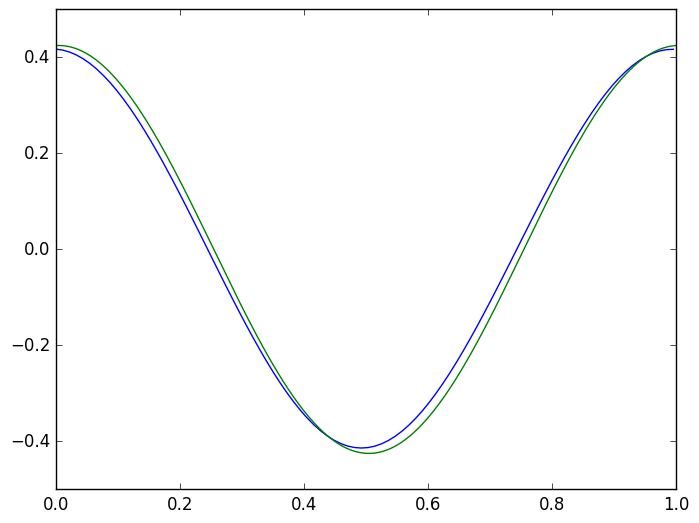

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f0ffdbeea50>

In [10]:
#Plots to compare

#UNSflow
data = readdlm("results.dat")
range = round(Int,(ncyc-1)*nsteps/ncyc)+1:nsteps
tbyT = (data[range,1]-data[range[1]])/T

plot(tbyT, data[range,6])
plot(t_theo, imag(cl_theo))


# It seems to be working but for some reason, the imaginary part of Theodorsen is giving the correct value. It should be the real part for a cosine function. Possibly a missing i.

# Lets try a sine flap

In [11]:
ndef = SinDef(0., beta_amp, w, 0.)
# everything else is unchanged
full_kinem = KinemDefwFlap(alphadef, hdef, udef, ndef)


UNSflow.KinemDefwFlap(UNSflow.ConstDef(0.0),UNSflow.ConstDef(0.0),UNSflow.ConstDef(1.0),UNSflow.SinDef(0.0,0.08726646259971647,7.86,0.0))

In [12]:
surf = TwoDSurfwFlap(1., 1., "FlatPlate", pvt, 70, 35, "Prescribed", full_kinem,x_b, lespcrit)

curfield = TwoDFlowField()

UNSflow.TwoDFlowField(0.0,0.0,UNSflow.TwoDVort[],UNSflow.TwoDVort[])

In [13]:
ldvm(surf, curfield, nsteps, dt)

(UNSflow.TwoDSurfwFlap(1.0,1.0,"FlatPlate",0.2,70,35,"Prescribed",UNSflow.KinemDefwFlap(UNSflow.ConstDef(0.0),UNSflow.ConstDef(0.0),UNSflow.ConstDef(1.0),UNSflow.SinDef(0.0,0.08726646259971647,7.86,0.0)),[0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0  …  0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0],[0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0  …  -0.00182324,-0.00189833,-0.00196495,-0.00202298,-0.00207228,-0.00211276,-0.00214433,-0.00216692,-0.0021805,-0.00218503],[-2.57804e-29,1.9332e-29,-7.72879e-29,3.79671e-28,-1.71224e-27,7.32839e-27,-3.04231e-26,1.23832e-25,-4.97107e-25,1.97516e-24  …  -0.00874012,-0.00874012,-0.00874012,-0.00874012,-0.00874012,-0.00874012,-0.00874012,-0.00874012,-0.00874012,-0.00874012],[0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0  …  -0.142377,-0.148241,-0.153444,-0.157975,-0.161825,-0.164986,-0.167451,-0.169216,-0.170276,-0.170629],[0.0,0.0455303,0.0910607,0.136591,0.182121,0.227652,0.273182,0.318712,0.364243,0.409773  …  2.73182,2.77735,2.82288,2.86841,2.91394,2.95947,3.005,3.0

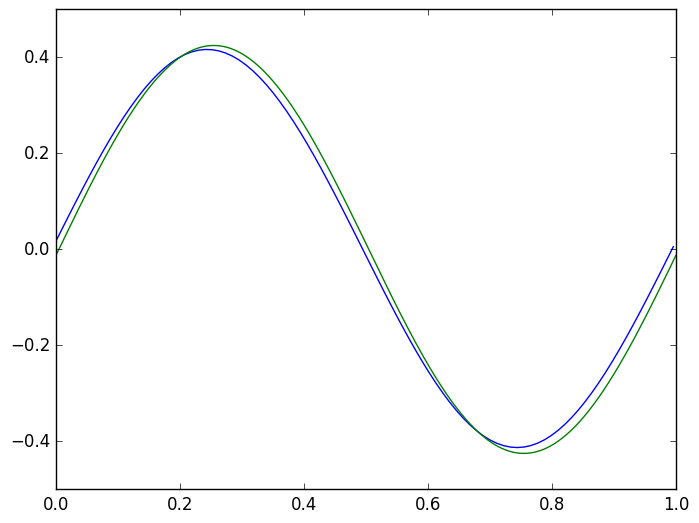

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f0ffdc610d0>

In [15]:
#Plots to compare

#UNSflow
data = readdlm("results.dat")
range = round(Int,(ncyc-1)*nsteps/ncyc)+1:nsteps
tbyT = (data[range,1]-data[range[1]])/T

plot(tbyT, data[range,6])
plot(t_theo, -real(cl_theo))

# Negative of the real value corresponds to the sine results. So it seems like a extra i, not a missing one. In any case, the LDVM implementation seems right 

# # Variation of Laura's case E - Pitch and flap

In [42]:
#Kinematics
alpha_amp = 5*pi/180
alpha_mean = 0.
alpha_zl = 0. #Flat plate
h_amp = 0. 
k = 3.93
beta_amp = 5*pi/180.

0.08726646259971647

In [43]:
#for UNSflow

w = 2*k 
T = (2*pi/w)
ncyc = 4
t_tot = ncyc*T 

dt = 0.015*0.2/(k*alpha_amp) 
nsteps =round(Int,t_tot/dt)+1

367

In [44]:
#for UNSflow

w = 2*k 
T = (2*pi/w)
ncyc = 4
t_tot = ncyc*T 

dt = 0.015*0.2/(k*beta_amp) 
nsteps =round(Int,t_tot/dt)+1

alphadef = CosDef(alpha_mean, alpha_amp, w, 0.)
hdef = ConstDef(h_amp)
udef = ConstDef(1.)
ndef = CosDef(0., beta_amp, w, 0.)

full_kinem = KinemDefwFlap(alphadef, hdef, udef, ndef)

pvt = 0.2 

lespcrit = [21;] #high value to turn off LEV shedding

x_b = [0.75;]

surf = TwoDSurfwFlap(1., 1., "FlatPlate", pvt, 70, 35, "Prescribed", full_kinem,x_b, lespcrit)

curfield = TwoDFlowField()

UNSflow.TwoDFlowField(0.0,0.0,UNSflow.TwoDVort[],UNSflow.TwoDVort[])

In [45]:
ldvm(surf, curfield, nsteps, dt)

(UNSflow.TwoDSurfwFlap(1.0,1.0,"FlatPlate",0.2,70,35,"Prescribed",UNSflow.KinemDefwFlap(UNSflow.CosDef(0.0,0.08726646259971647,7.86,0.0),UNSflow.ConstDef(0.0),UNSflow.ConstDef(1.0),UNSflow.CosDef(0.0,0.08726646259971647,7.86,0.0)),[0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0  …  0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0],[0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0  …  -0.0181584,-0.0189062,-0.0195698,-0.0201477,-0.0206387,-0.0210418,-0.0213563,-0.0215813,-0.0217165,-0.0217616],[-2.56758e-28,1.92535e-28,-7.69743e-28,3.7813e-27,-1.70529e-26,7.29865e-26,-3.02997e-25,1.23329e-24,-4.9509e-24,1.96715e-23  …  -0.0870466,-0.0870466,-0.0870466,-0.0870466,-0.0870466,-0.0870466,-0.0870466,-0.0870466,-0.0870466,-0.0870466],[0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0  …  0.0144389,0.0150335,0.0155612,0.0160207,0.0164111,0.0167317,0.0169817,0.0171606,0.0172682,0.017304],[0.0,0.0455303,0.0910607,0.136591,0.182121,0.227652,0.273182,0.318712,0.364243,0.409773  …  2.73182,2.77735,2.82288,2.86841,2.91394,2.95947,3.0

In [46]:
#for Theodorsen
theo_in = TheoDefwFlap(alpha_amp, h_amp, alpha_mean, alpha_zl, k, 0., pvt, beta_amp, x_b[1], 0.)
(t_theo, _, cl_h, cl_alpha, cl_beta, cl_theo) = theodorsen(theo_in)

([0.0,0.00277778,0.00555556,0.00833333,0.0111111,0.0138889,0.0166667,0.0194444,0.0222222,0.025  …  0.975,0.977778,0.980556,0.983333,0.986111,0.988889,0.991667,0.994444,0.997222,1.0],0.0,Complex{Float64}[0.0+0.0im,0.0+0.0im,0.0+0.0im,0.0+0.0im,0.0+0.0im,0.0+0.0im,0.0+0.0im,0.0+0.0im,0.0+0.0im,0.0+0.0im  …  0.0-0.0im,0.0-0.0im,0.0-0.0im,0.0-0.0im,0.0-0.0im,0.0-0.0im,0.0-0.0im,0.0-0.0im,0.0-0.0im,0.0-0.0im],Complex{Float64}[-2.19083+2.2546im,-2.22985+2.21602im,-2.26818+2.17677im,-2.30583+2.13685im,-2.34277+2.09628im,-2.379+2.05507im,-2.4145+2.01324im,-2.44927+1.9708im,-2.48329+1.92775im,-2.51656+1.88412im  …  -1.81116+2.56956im,-1.85573+2.53756im,-1.89974+2.50479im,-1.94316+2.47125im,-1.98599+2.43696im,-2.02822+2.40193im,-2.06983+2.36617im,-2.11081+2.32968im,-2.15115+2.29249im,-2.19083+2.2546im],Complex{Float64}[0.012327+0.424731im,0.0049125+0.424881im,-0.00250345+0.424902im,-0.00991863+0.424794im,-0.0173308+0.424556im,-0.0247377+0.424189im,-0.032137+0.423693im,-0.0395266+0.423067im,-0.04

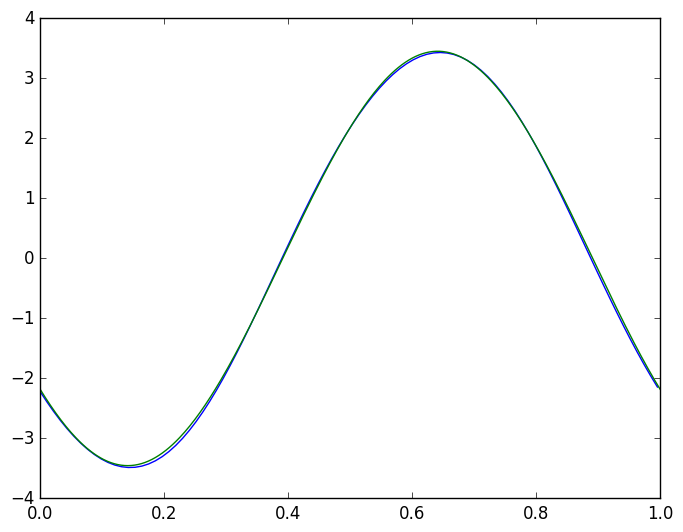

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f0ff9e98b90>

In [58]:
#Plots to compare

#UNSflow
data = readdlm("results.dat")
range = round(Int,(ncyc-1)*nsteps/ncyc)+1:nsteps
tbyT = (data[range,1]-data[range[1]])/T

plot(tbyT, data[range,6])
plot(t_theo, real(cl_theo))


# Looks good. alpha=10 + flap=5 becomes large angle and we start seeing differences between LDVM and theodorsen